In [1]:
from __future__ import print_function, division
import sys
sys.path.append('/Users/rkp/Dropbox/Repositories/yes_we_cam')

In [2]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import api
import metrics
import time_series

In [3]:
NWB_LEAST_VARIABLE = '/Volumes/Brain2015/CAM/483155697/483155697.nwb'
NWB_MOST_VARIABLE = '/Volumes/Brain2015/CAM/479681980/479681980.nwb'

DETREND_WINDOW = 180
NEURONS_PER_STIM = 10

SPACING_VERTICAL = 10

In [4]:
df_least = metrics.variability_stim_conditioned(
    NWB_LEAST_VARIABLE, DETREND_WINDOW, NEURONS_PER_STIM
)
df_most = metrics.variability_stim_conditioned(
    NWB_MOST_VARIABLE, DETREND_WINDOW, NEURONS_PER_STIM
)

/Volumes/Brain2015/CAM/483155697/483155697.nwb
/Volumes/Brain2015/CAM/479681980/479681980.nwb


# Least variable population response

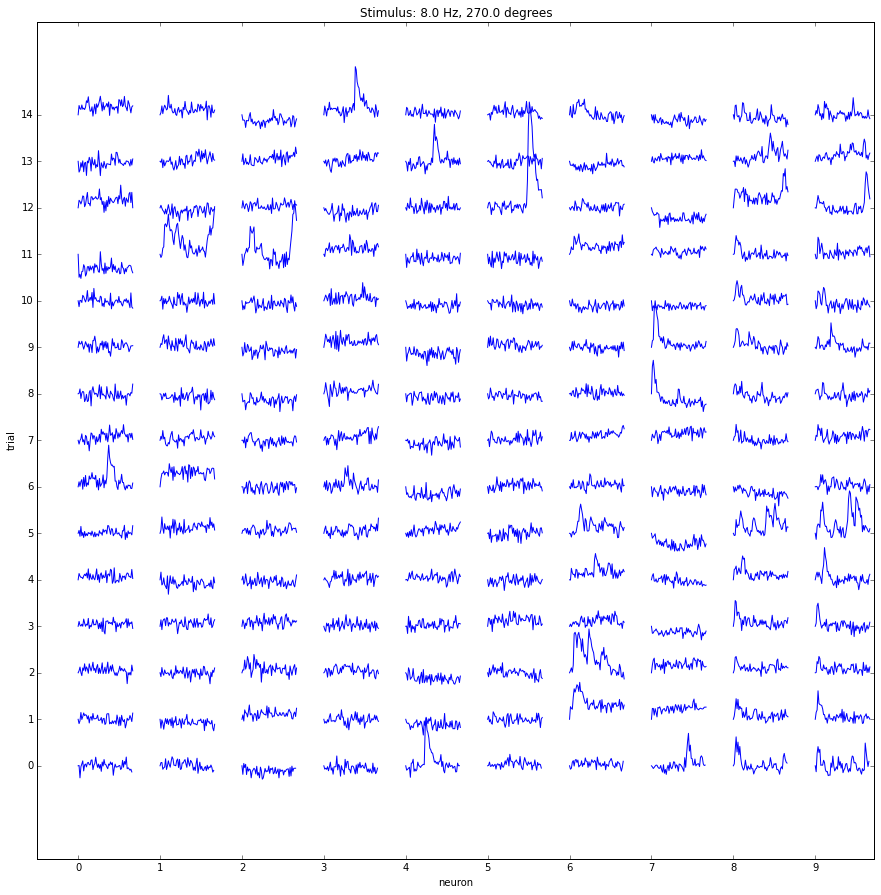

In [5]:
tf, ori, _, neurons = df_least.loc[df_least['variability'].argmin()]
stim_table = api.get_stimulus_table(NWB_LEAST_VARIABLE)
mask = (stim_table['temporal_frequency'] == tf) & \
    (stim_table['orientation'] == ori)
starts, ends = stim_table[['start', 'end']][mask].values.T
time_vec, traces = api.get_fluorescence_traces(NWB_LEAST_VARIABLE)
traces -= time_series.windowed_mean(traces, DETREND_WINDOW)
traces /= np.tile(traces.std(axis=1)[:, None], (1, traces.shape[1]))

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
dur = time_vec[ends[0]] - time_vec[starts[0]]
for stim_ctr, (start, end) in enumerate(zip(starts, ends)):
    for neur_ctr, trace in enumerate(traces[neurons, start:end]):
        t = time_vec[start:end] - time_vec[start]
        ax.plot(
            t + (neur_ctr + 0.5)*dur*1.5,
            trace - trace[0] + stim_ctr*SPACING_VERTICAL, 'b'
        )
        
ax.set_xticks((np.arange(len(neurons)) + 0.5)*dur*1.5)
ax.set_xticklabels(range(len(neurons)))
ax.set_xlabel('neuron')

ax.set_yticks(SPACING_VERTICAL*np.arange(len(starts)))
ax.set_yticklabels(range(len(starts)))
ax.set_ylabel('trial')

ax.set_title('Stimulus: {} Hz, {} degrees'.format(tf, ori))

# Most variable population response

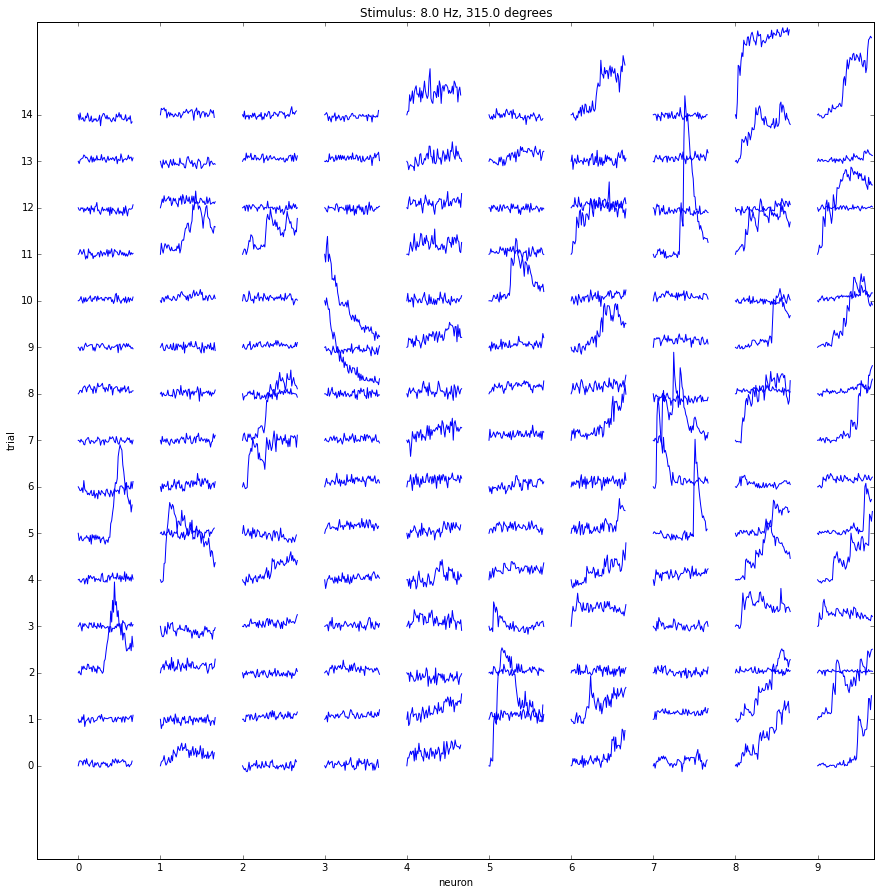

In [6]:
tf, ori, _, neurons = df_most.loc[df_most['variability'].argmax()]
stim_table = api.get_stimulus_table(NWB_MOST_VARIABLE)
mask = (stim_table['temporal_frequency'] == tf) & \
    (stim_table['orientation'] == ori)
starts, ends = stim_table[['start', 'end']][mask].values.T
time_vec, traces = api.get_fluorescence_traces(NWB_MOST_VARIABLE)
traces -= time_series.windowed_mean(traces, DETREND_WINDOW)
traces /= np.tile(traces.std(axis=1)[:, None], (1, traces.shape[1]))

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
dur = time_vec[ends[0]] - time_vec[starts[0]]
for stim_ctr, (start, end) in enumerate(zip(starts, ends)):
    for neur_ctr, trace in enumerate(traces[neurons, start:end]):
        t = time_vec[start:end] - time_vec[start]
        ax.plot(
            t + (neur_ctr + 0.5)*dur*1.5,
            trace - trace[0] + stim_ctr*SPACING_VERTICAL, 'b'
        )
        
ax.set_xticks((np.arange(len(neurons)) + 0.5)*dur*1.5)
ax.set_xticklabels(range(len(neurons)))
ax.set_xlabel('neuron')

ax.set_yticks(SPACING_VERTICAL*np.arange(len(starts)))
ax.set_yticklabels(range(len(starts)))
ax.set_ylabel('trial')

ax.set_title('Stimulus: {} Hz, {} degrees'.format(tf, ori))